<a href="https://colab.research.google.com/github/Dago86/PhilosophersOnWikidata/blob/main/wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SPARQLWrapper

In [ ]:
!pip install wikipedia

In [ ]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """select ?philosopher ?philosopherLabel ?date
{?philosopher wdt:P106 wd:Q4964182 ;
 wdt:P569 ?date .
 FILTER (YEAR(?date) >= 1880)
 SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
 }"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result['philosopherLabel']['value'])

In [ ]:
import wikipedia

In [ ]:
wikipedia.search("Emanuele Severino")
wikipedia.set_lang("it")
phil = wikipedia.page("Emanuele Severino")
print(phil.content)

In [ ]:
'''select ?philosopher ?philosopherLabel ?date ?wikisourceSiteLink 
{?philosopher wdt:P106 wd:Q4964182 ;
 wdt:P569 ?date .
 ?wikisourceSiteLink schema:isPartOf [ wikibase:wikiGroup "wikisource" ];
                      schema:inLanguage "en";
                      schema:about ?philosopher.
 FILTER (YEAR(?date) >= 1700)
 SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
 }
limit 10


SELECT ?philosopher ?philosopherLabel ?date ?immagine ?opere_rilevanti ?opere_rilevantiLabel WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 1500 )
  FILTER((YEAR(?date)) <= 2000 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  OPTIONAL { ?philosopher wdt:P18 ?immagine. }
  OPTIONAL { ?philosopher wdt:P800 ?opere_rilevanti. }  
}



COUNT DAL -500 a 0
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= -500 )
  FILTER((YEAR(?date)) <= 0 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count

QUERY PER CERCARE QUELLI CON LE OPERE PIU RILEVANTI
SELECT (count(?philosopherLabel) AS ?count)  ?philosopherLabel WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 1500 )
  FILTER((YEAR(?date)) <= 2000 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  OPTIONAL { ?philosopher wdt:P18 ?immagine. }
  OPTIONAL { ?philosopher wdt:P800 ?opere_rilevanti. }  
} GROUP BY ?philosopherLabel
ORDER BY DESC(?count)


QUERY PER CONTARE LE NAZIONI CON PIU' FILOSOFI IN UN PERIODO STORICO PRECISO
SELECT (COUNT(?paese_di_cittadinanzaLabel) AS ?count) ?paese_di_cittadinanzaLabel WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 1500 )
  FILTER((YEAR(?date)) <= 2000 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  OPTIONAL { ?philosopher wdt:P27 ?paese_di_cittadinanza. }
} GROUP BY ?paese_di_cittadinanzaLabel
ORDER BY DESC(?count)

'''

1) Numero dei filosofi totali dal 500 a.c ad oggi

2) da 500 a.c a 0 a.c / da 0 a 1000 e da 1000 a 2021. Gen x e filosofi millenials (dal 1975 in poi)

3) divisione geografica (p.e. concentrazione per country o continenti)

4) divisione per correnti (p.e. esistenziali, presocratrici, aristotelici, etc)

5)divisione per sesso



Import necessari per eseguire il codice. Si autogenerano grazie all'opzione specifica di Wikidata Query Service!


In [ ]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

Partiamo con il dato più semplice possibile: quanti filosofi troviamo su wikidata?

In [ ]:
endpoint_url = "https://query.wikidata.org/sparql"

query_phil = """
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

query_mat="""
SELECT (count(DISTINCT ?mathematician) AS ?count)   WHERE {
  ?mathematician  wdt:P106 wd:Q170790;
    wdt:P569 ?date.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

query_writer="""

SELECT (count(DISTINCT ?writer  ) AS ?count)   WHERE {
  ?writer    wdt:P106 wd:Q36180;
    wdt:P569 ?date.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""


query_phis="""
SELECT (count(DISTINCT ?physicist   ) AS ?count)   WHERE {
  ?physicist     wdt:P106 wd:Q169470;
    wdt:P569 ?date.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results_phil = get_results(endpoint_url, query_phil)

for result in results_phil["results"]["bindings"]:
    print(result['count']['value'])
    num_phil=result['count']['value']

results_mat = get_results(endpoint_url, query_mat)

for result in results_mat["results"]["bindings"]:
    print(result['count']['value'])
    num_mat=result['count']['value']

results_writer = get_results(endpoint_url, query_writer)

for result in results_writer["results"]["bindings"]:
    print(result['count']['value'])
    num_writer=result['count']['value']

results_phis = get_results(endpoint_url, query_phis)

for result in results_phis["results"]["bindings"]:
    print(result['count']['value'])
    num_phis=result['count']['value']


20576
21922
252035
19798


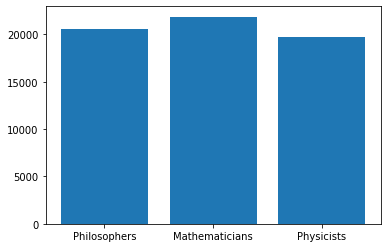

In [ ]:
#@title
import matplotlib.pyplot as plt

fig = plt.figure()
langs = ['Philosophers', 'Mathematicians', 'Physicists']
students = [int(num_phil),int(num_mat), int(num_phis)]
plt.bar(langs,students)
plt.show()

Nel prossimo blocco dividiamo il numero dei filosofi in epoche storiche, così come le conosciamo a scuola: filosofi dell'età antica, medievale, moderna e contemporanea.

In [ ]:
#@title
endpoint_url = "https://query.wikidata.org/sparql"

query_phil_ancient = """
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= -1500 )
  FILTER((YEAR(?date)) <= 476 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

query_phil_medieval = """
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 476 )
  FILTER((YEAR(?date)) <= 1492 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count
"""

query_phil_modern="""
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 1493 )
  FILTER((YEAR(?date)) <= 1800 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

query_phil_contemporary="""SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= 1801 )
  FILTER((YEAR(?date)) <= 2000 )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results_query_phil_ancient = get_results(endpoint_url, query_phil_ancient)
results_query_phil_medieval = get_results(endpoint_url, query_phil_medieval)
results_query_phil_modern = get_results(endpoint_url, query_phil_modern)
results_query_phil_contemporary = get_results(endpoint_url, query_phil_contemporary)

for result in results_query_phil_ancient["results"]["bindings"]:
    print(result['count']['value'])
    num_ancient=result['count']['value']

for result in results_query_phil_medieval["results"]["bindings"]:
    print(result['count']['value'])
    num_medieval=result['count']['value']

for result in results_query_phil_modern["results"]["bindings"]:
    print(result['count']['value'])
    num_modern=result['count']['value']
    
for result in results_query_phil_contemporary["results"]["bindings"]:
    print(result['count']['value'])
    num_contemporary=result['count']['value']



653
943
2602
16308


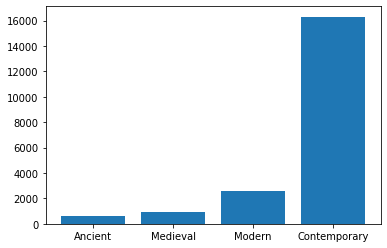

In [ ]:
#@title
import matplotlib.pyplot as plt

fig = plt.figure()
cat = ['Ancient', 'Medieval', 'Modern', 'Contemporary']
philosophers_in_era = [int(num_ancient),int(num_medieval), int(num_modern), int(num_contemporary)]
plt.bar(cat,philosophers_in_era)
plt.show()

Su wikidata abbiamo **più filosofi negli ultimi 200 anni che per tutto il resto della nostra storia**. Lo avreste mai detto? 
Puoi provare a modificare gli estremi di ricerca. Io ho utilizzato dei periodi standard. Perché non provi a vedere quanti filosofi sono nati negli ultimi cinquant'anni?

In [ ]:
import ipywidgets as widgets
print("Seleziona la data di limitazione inferiore")
slider = widgets.IntSlider(value=1000, max=2000)
display(slider)
print("Seleziona la data di limitazione superiore")
slider_2 = widgets.IntSlider(value=1000, max=2000)
display(slider_2)
print("Devi eseguire questa cella solo una volta, è interattiva, quindi dopo aver selezionato il range desiderato esegui solamente la cella successiva!")

Seleziona la data di limitazione inferiore


IntSlider(value=1000, max=2000)

Seleziona la data di limitazione superiore


IntSlider(value=1000, max=2000)

Devi eseguire questa cella solo una volta, è interattiva, quindi dopo aver selezionato il range desiderato esegui solamente la cella successiva!


In [ ]:
endpoint_url = "https://query.wikidata.org/sparql"

query_phil_you_search = """
SELECT (count(DISTINCT ?philosopher) AS ?count)   WHERE {
  ?philosopher wdt:P106 wd:Q4964182;
    wdt:P569 ?date.
  FILTER((YEAR(?date)) >= """+ str(slider.value)+""" )
  FILTER((YEAR(?date)) <= """+str(slider_2.value)+""" )
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} GROUP BY ?count"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results_query_phil_you_search = get_results(endpoint_url, query_phil_you_search)

for result in results_query_phil_you_search["results"]["bindings"]:
    print(result['count']['value'])
    num_phil_you_search=result['count']['value']

10806
